# Introduction

In this mini project, I will examine a netflix shows and movies dataset to uncover some fun insights. The dataset is provided by Rohit Grewal, and can be downloaded from `https://www.kaggle.com/datasets/rohitgrewal/netflix-data`

To begin, I just want to get an idea of what the data looks like.

In [134]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

netflix = pd.read_csv("data/Netflix Dataset.csv")
netflix.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [135]:
netflix.tail()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7788,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [136]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


# Q1: Which year saw the highest number of TV shows and movies released? 

In [137]:
# discard rows with null Release_Date values
netflix = netflix[netflix["Release_Date"].notna()]

# I'll need to extract the year from the Release_Date column
netflix["Release_Year"] = netflix["Release_Date"].str[-4:].astype(int)

releases_per_year = \
    netflix["Release_Year"].value_counts().sort_values(ascending=False)

releases_per_year.head()

Release_Year
2019    2154
2020    2010
2018    1685
2017    1225
2016     443
Name: count, dtype: int64

In [138]:
top_year = releases_per_year.idxmax()
top_count = releases_per_year.max()
print(f"{top_year} had the most releases, with a count of {top_count} releases that year.")

2019 had the most releases, with a count of 2154 releases that year.


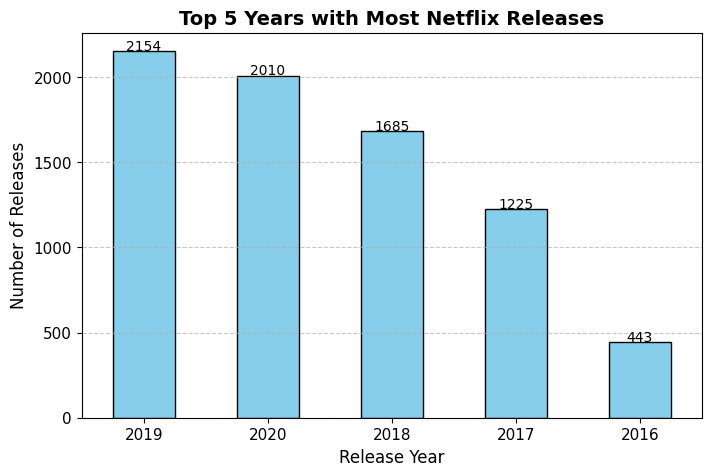

In [139]:
top_5_years = releases_per_year.head(5)
plt.figure(figsize=(8,5))
top_5_years.plot.bar(color="skyblue", edgecolor="black")

plt.title("Top 5 Years with Most Netflix Releases", fontsize=14, weight="bold")
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Number of Releases", fontsize=12)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis="y", linestyle="--", alpha=0.7) 

for i, count in enumerate(top_5_years.values):
    plt.text(i, count + 5, str(count), ha="center", fontsize=10)

plt.show()

# Q2: What is the ratio of movies to tv shows?

In [140]:
category_counts = netflix["Category"].value_counts()
category_counts

Category
Movie      5379
TV Show    2400
Name: count, dtype: int64

In [141]:
ratio = category_counts["Movie"] / category_counts["TV Show"]
print(f"Movie-to_TV Shows ratio: {ratio:.2f}")

Movie-to_TV Shows ratio: 2.24


# Q3: Show the titles of all TV shows released in Canada only

In [142]:
canada_tv = netflix[
        (netflix["Category"] == "TV Show") & 
        (netflix["Country"] == "Canada")
    ]
canada_tv

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Release_Year
87,s88,TV Show,21 Thunder,NaN,"Stephanie Bennett, Emmanuel Kabongo, RJ Fether...",Canada,"March 1, 2018",TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",Players and coaches for a Montreal soccer team...,2018
389,s390,TV Show,Alias Grace,NaN,"Sarah Gadon, Edward Holcroft, Paul Gross, Anna...",Canada,"November 3, 2017",TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In 19th-century Canada, a psychiatrist weighs ...",2017
539,s540,TV Show,Anne with an E,NaN,"Amybeth McNulty, Geraldine James, R.H. Thomson...",Canada,"January 3, 2020",TV-PG,3 Seasons,"International TV Shows, TV Dramas, Teen TV Shows",A plucky orphan whose passions run deep finds ...,2020
685,s686,TV Show,Bad Blood,NaN,"Anthony LaPaglia, Kim Coates, Enrico Colantoni...",Canada,"May 31, 2019",TV-MA,2 Seasons,"Crime TV Shows, TV Dramas",This sprawling crime drama follows the true st...,2019
783,s784,TV Show,Beast Legends,NaN,"Steve Leonard, Francis Manapul, Kathryn Dennin...",Canada,"February 1, 2019",TV-PG,1 Season,Docuseries,A diverse crew of experts dive deep into the o...,2019
791,s792,TV Show,Beauty & the Beast,NaN,"Kristin Kreuk, Jay Ryan, Max Brown, Austin Bas...",Canada,"September 19, 2016",TV-14,4 Seasons,"Crime TV Shows, Romantic TV Shows, TV Dramas",A homicide detective and a veteran who has bee...,2016
862,s863,TV Show,Between,NaN,"Jennette McCurdy, Jesse Carere, Ryan Allen, Ju...",Canada,"July 1, 2016",TV-14,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",After a mysterious disease kills every residen...,2016
940,s941,TV Show,Bitten,NaN,"Laura Vandervoort, Greyston Holt, Greg Bryk, S...",Canada,"May 26, 2016",TV-MA,3 Seasons,"International TV Shows, TV Dramas, TV Horror",Elena Michaels tries to stray from the pack of...,2016
994,s995,TV Show,Blown Away,NaN,NaN,Canada,"July 12, 2019",TV-14,1 Season,"International TV Shows, Reality TV",Ten master artists turn up the heat in glassbl...,2019
1010,s1011,TV Show,Bo on the Go!,NaN,"Catherine O'Connor, Andrew Sabiston, Jim Fowler",Canada,"March 21, 2019",TV-Y,1 Season,Kids' TV,Staying at home doesn't mean sitting still for...,2019


# Q4: Show the top 10 directors who contributed the most amount of content to Netflix

In [143]:
# a temporary dataframe to hold a subset of the netflix dataset where the director value is not missing
df = netflix.copy()
df = df[df['Director'].notna()]
df[df['Director'].str.strip().eq('')]
df.shape

(5401, 12)

In [144]:
df['Director'].value_counts().head(20)

Director
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Robert Rodriguez           8
Quentin Tarantino          8
Shannon Hartman            8
Ryan Polito                8
Hakan Algül                8
Johnnie To                 8
Lance Bangs                8
Kunle Afolayan             8
Omoni Oboli                7
Don Michael Paul           7
Ozan Açıktan               7
Name: count, dtype: int64

In [145]:
# okay since there may be multiple directors present in the column, I need to separate them out
df['Director'] = df['Director'].str.split(',')
df = df.explode('Director')
df.loc[:, 'Director'] = df['Director'].str.strip()

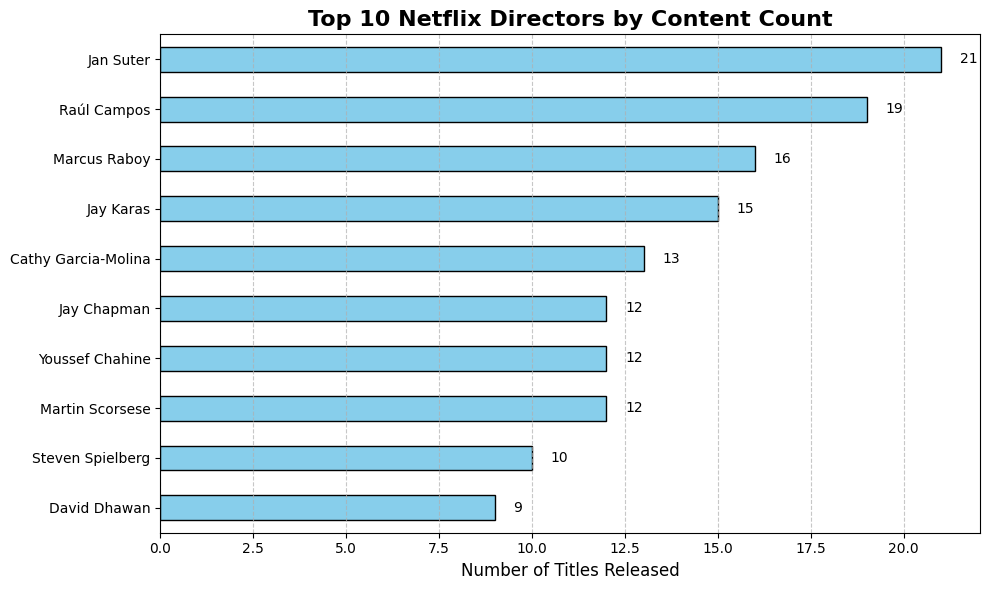

In [155]:
top_directors = (
    df['Director']
    .dropna()
    .value_counts()
    .head(10)
)

ax = top_directors.sort_values().plot.barh(
    figsize=(10,6),       
    color="skyblue",       
    edgecolor="black"      
)

ax.set_title("Top 10 Netflix Directors by Content Count", fontsize=16, weight="bold")
ax.set_xlabel("Number of Titles Released", fontsize=12)
ax.set_ylabel("")

ax.grid(axis="x", linestyle="--", alpha=0.7)

for i, v in enumerate(top_directors.sort_values()):
    ax.text(v + 0.5, i, str(v), va="center", fontsize=10)

plt.tight_layout()
plt.show()